In [59]:
import numpy as np
import pandas as pd
import random
random.seed(128)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [62]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
df = df.dropna(subset=['Credit_History'])

In [64]:
df.isnull().sum()

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [66]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

In [67]:
df.isnull().sum()

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [68]:
df['Gender'].fillna(method='ffill', inplace=True)
df['Married'].fillna(method='ffill', inplace=True)
df['Dependents'].fillna(method='ffill', inplace=True)
df['Self_Employed'].fillna(method='ffill', inplace=True)

In [69]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             564 non-null    object 
 2   Married            564 non-null    object 
 3   Dependents         564 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      564 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         564 non-null    float64
 9   Loan_Amount_Term   564 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.7+ KB


In [71]:
df.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,145.088398,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N


In [72]:
duplicated_rows = df.duplicated().sum()

print('Number of Duplicate rows:', duplicated_rows)

Number of Duplicate rows: 0


In [73]:
categories_count = df['Loan_Status'].value_counts()
print("Value count of each Loan status")
print(categories_count)

Value count of each Loan status
Y    385
N    179
Name: Loan_Status, dtype: int64


In [74]:
df['Gender'].value_counts()

Male      461
Female    103
Name: Gender, dtype: int64

In [75]:
df['Education'].value_counts()

Graduate        443
Not Graduate    121
Name: Education, dtype: int64

In [76]:
def student_status(Education):
    if Education == 'Graduate':
        return 'Worker'
    else:
        return 'Student'

df['student_status'] = df['Education'].apply(student_status)

In [77]:
df['student_status'].value_counts()

Worker     443
Student    121
Name: student_status, dtype: int64

In [78]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,564.000000,564.000000,564.000000,564.000000,564.000000
mean,5466.436170,1530.448440,145.088398,342.152727,0.842199
std,6271.344106,2471.721359,81.740935,63.778190,0.364878
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2892.750000,0.000000,101.750000,360.000000,1.000000
50%,3815.000000,1105.500000,128.500000,360.000000,1.000000
75%,5803.750000,2250.000000,162.000000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


In [79]:
from scipy import stats


In [80]:
z_scores = np.abs(stats.zscore(df['LoanAmount']))

df_outliers = df[z_scores > 5]
df_outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,student_status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,Worker
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,Worker
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N,Worker
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y,Worker


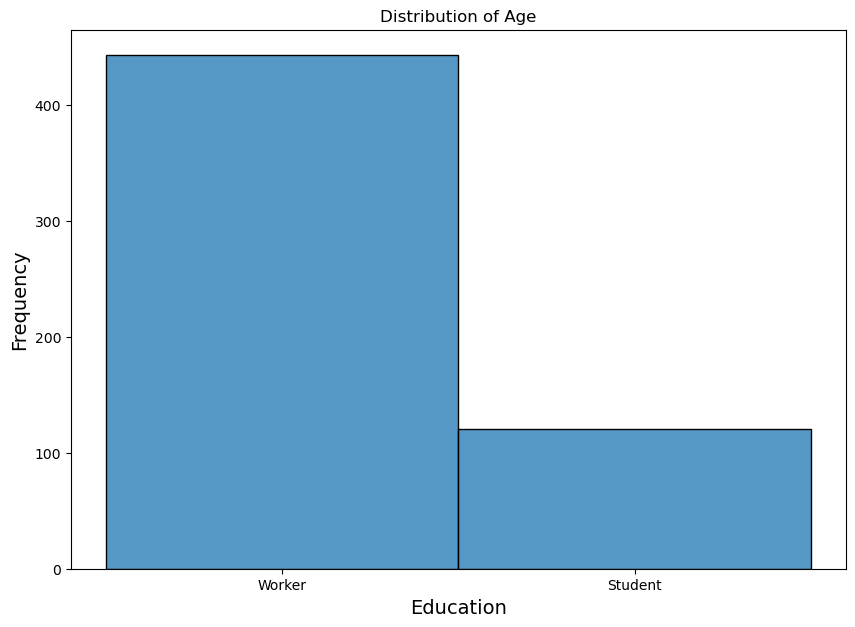

In [81]:
plt.figure(figsize=(10, 7)) #Setting the size of the plot

# sns.histplot(df['age_years'])
sns.histplot(data=df, x = 'student_status')
plt.xlabel('Education', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Age')
plt.show()

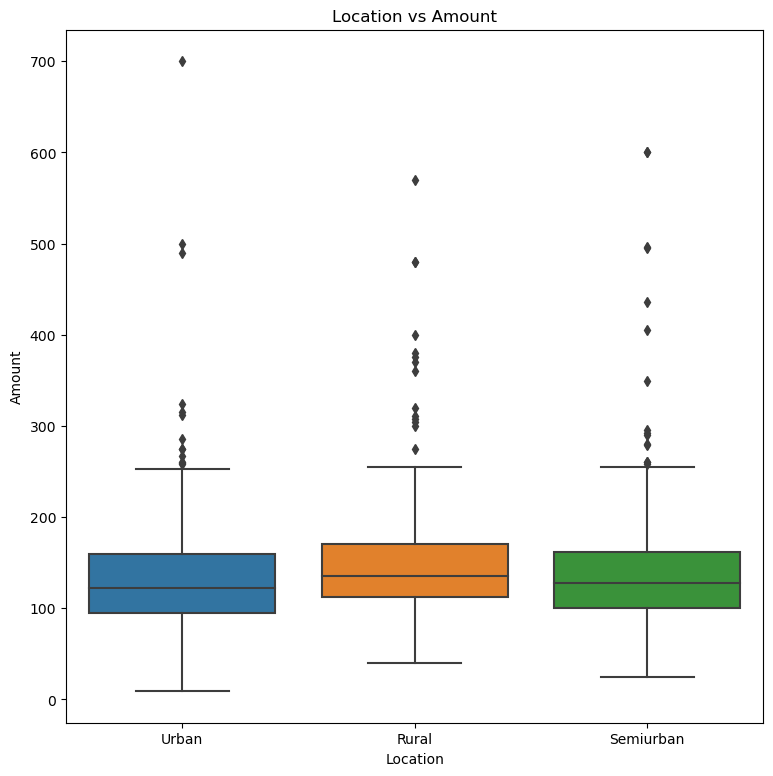

In [82]:
plt.figure(figsize=(9, 9))

sns.boxplot(x='Property_Area', y='LoanAmount', data=df)
plt.xlabel('Location')
plt.ylabel('Amount')
plt.title("Location vs Amount")
plt.show()

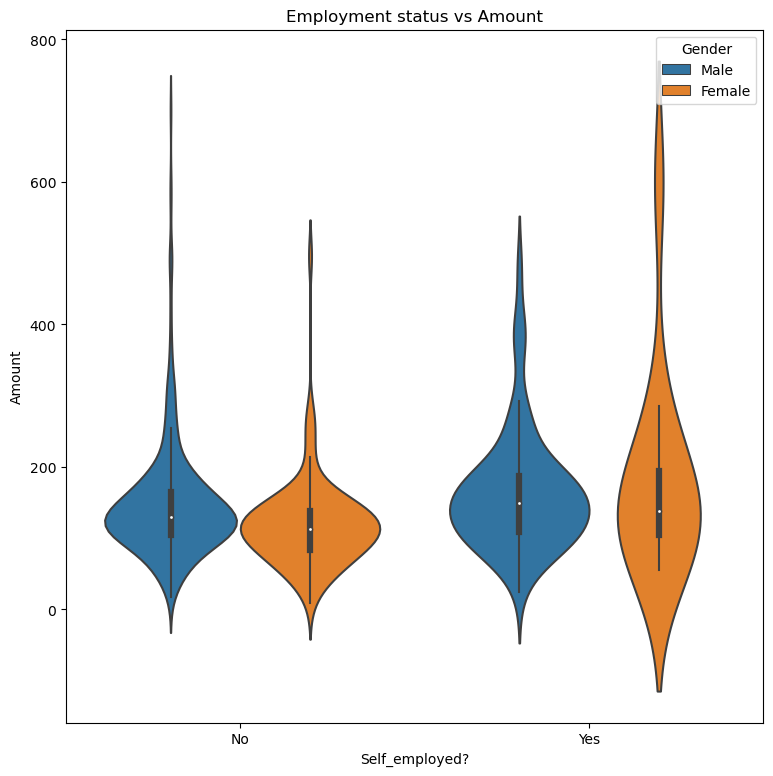

In [83]:
plt.figure(figsize=(9, 9))

sns.violinplot(x='Self_Employed', y='LoanAmount', hue='Gender', data=df)
plt.xlabel('Self_employed?')
plt.ylabel('Amount')
plt.title("Employment status vs Amount")
plt.show()

In [95]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             564 non-null    object 
 2   Married            564 non-null    object 
 3   Dependents         564 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      564 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         564 non-null    float64
 9   Loan_Amount_Term   564 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
 13  student_status     564 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 66.1+ KB


In [103]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])
df['student_status'] = label_encoder.fit_transform(df['student_status'])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             564 non-null    int64  
 2   Married            564 non-null    int32  
 3   Dependents         564 non-null    int32  
 4   Education          564 non-null    int32  
 5   Self_Employed      564 non-null    int32  
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         564 non-null    float64
 9   Loan_Amount_Term   564 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    int32  
 12  Loan_Status        564 non-null    int32  
 13  student_status     564 non-null    int32  
dtypes: float64(4), int32(7), int64(2), object(1)
memory usage: 50.7+ KB


In [105]:
df = df.drop(columns=['Loan_ID'])

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             564 non-null    int64  
 1   Married            564 non-null    int32  
 2   Dependents         564 non-null    int32  
 3   Education          564 non-null    int32  
 4   Self_Employed      564 non-null    int32  
 5   ApplicantIncome    564 non-null    int64  
 6   CoapplicantIncome  564 non-null    float64
 7   LoanAmount         564 non-null    float64
 8   Loan_Amount_Term   564 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      564 non-null    int32  
 11  Loan_Status        564 non-null    int32  
 12  student_status     564 non-null    int32  
dtypes: float64(4), int32(7), int64(2)
memory usage: 46.3 KB


In [107]:
X = df.drop(columns=['Loan_Status'])
y = df["Loan_Status"]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
model_pipe = Pipeline(
    steps = [
        ("scaler", StandardScaler()),
        ("features", PolynomialFeatures()),
        ("model", LogisticRegression())
#         ("model", RandomForestClassifier())
    ]
)

model_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('features', PolynomialFeatures()),
                ('model', LogisticRegression())])

In [110]:
predictions = model_pipe.predict(X_test)

In [111]:
acc = accuracy_score(y_test, predictions)
print(f"Accuracy score of our model is {round(acc * 100, 2)} %")

Accuracy score of our model is 80.53 %


In [112]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.64      0.69        39
           1       0.82      0.89      0.86        74

    accuracy                           0.81       113
   macro avg       0.79      0.77      0.78       113
weighted avg       0.80      0.81      0.80       113



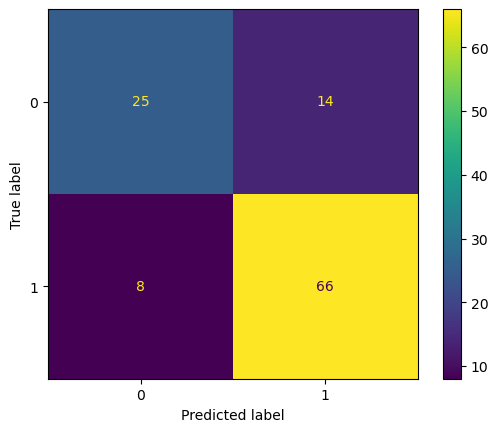

In [113]:
cm = confusion_matrix(y_test, predictions)


display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=model_pipe.named_steps.model.classes_)
display.plot()
plt.grid(False)
plt.show()